<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Insect_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy==1.22.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
rembg 2.0.37 requires numpy>=1.23.5, but you have numpy 1.22.0 which is incompatible.


In [7]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 143 (delta 18), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (143/143), 43.04 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [4]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [5]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/Training/'+cls
    for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        
        #Resize
        resizedImage = cv2.resize(realimage, (400,400))
        #contrast improve
        color_contrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogram_image=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        clahe_image=cv2.merge((op2_R,op2_G,op2_B))
        #outputImages=[smooth_image, histogram_image,clahe_image]
        #titles=['Original Image','Adjust histogram','clahe Image']
        #for i in range(3):
         #   plt.subplot(1,3,i+1)
          #  plt.imshow(outputImages[i])
           # plt.title(titles[i])
            #plt.xticks([])
            #plt.yticks([])
        #plt.show()
       
        x.append(clahe_image)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/Preprocessed/'+str(img_no)+'.jpg',clahe_image)   
        #img_no+=1
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

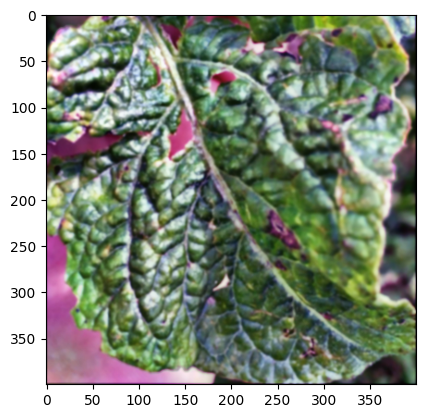

In [ ]:
plt.imshow(x[150])

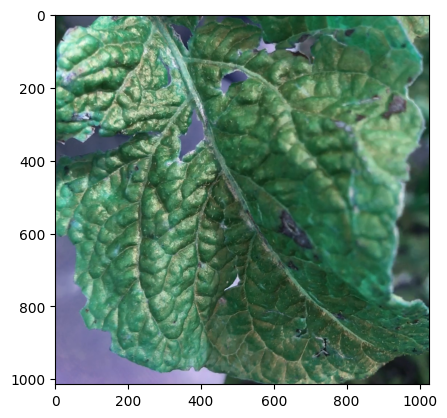

In [ ]:
plt.imshow(z[150])

(array([   0.,   10.,   10.,   43.,   56.,   89.,  104.,  122.,  148.,
         161.,  229.,  307.,  419.,  478.,  598.,  712.,  793., 1003.,
         946., 1252., 1278., 1286., 1499., 1445., 1473., 1471., 1626.,
        1547., 1649., 1582., 1578., 1692., 1625., 1737., 1634., 1639.,
        1711., 1845., 1757., 1770., 1905., 1716., 1829., 2060., 1759.,
        1833., 1784., 1696., 1928., 1639., 1782., 1606., 1825., 1751.,
        1605., 1698., 1609., 1613., 1589., 1522., 1468., 1489., 1502.,
        1496., 1493., 1500., 1524., 1404., 1529., 1489., 1520., 1551.,
        1537., 1478., 1521., 1499., 1522., 1502., 1558., 1532., 1593.,
        1568., 1465., 1582., 1564., 1611., 1603., 1651., 1660., 1583.,
        1636., 1693., 1719., 1813., 1786., 1769., 1737., 1709., 1833.,
        1822., 1890., 1817., 1859., 1826., 1882., 2007., 1931., 1931.,
        1913., 1984., 1947., 1948., 2041., 1962., 1941., 1947., 1955.,
        2031., 2104., 2095., 2092., 2073., 2172., 2116., 2077., 2241.,
      

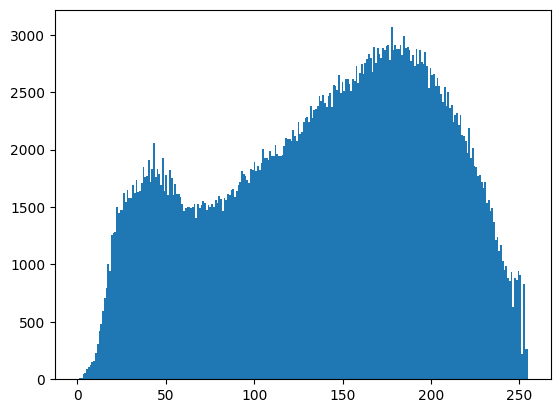

In [ ]:
plt.hist(x[100].flat, bins=256, range=(0,255))

**Segmentation**

In [ ]:
x=[]
pth = '/content/drive/MyDrive/Insect/Preprocessed'
for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        img1 = cv2.resize(realimage, (400,400))
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)
        cv2.imwrite('/content/drive/MyDrive/Insect/bgRemove/'+str(img_no)+'.jpg',bg_rem_img)   
        img_no+=1

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 86.4GB/s]


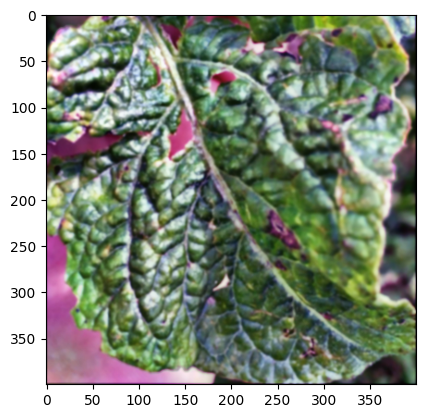

In [ ]:
plt.imshow(x[150])

In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/bgRemove/')
classes = {'Colorado':0, 'flea':1}

In [7]:
x=[]
y=[]
z=[]

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgRemove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1) 

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)
        
        x.append(result)
        y.append(classes[cls])
        z.append(img)

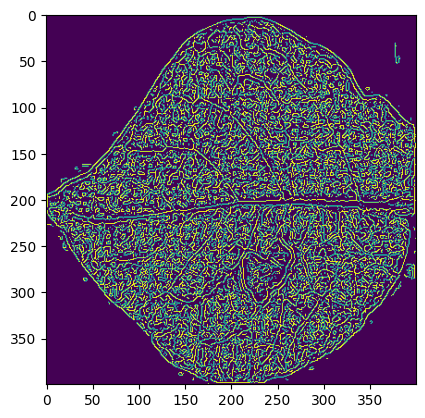

In [ ]:
plt.imshow(x[15])

In [8]:
np.unique(y)

array([0, 1])

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
pd.Series(y). value_counts()

1    210
0    190
dtype: int64

In [11]:
#Prepare data
x_updated = x.reshape(len(x), -1)
x_updated.shape

(400, 160000)

In [12]:
# Split dataset into random train and test subsets:
xtrain, xtest,ytrain,ytest = train_test_split(x_updated, y, random_state=10,test_size=20)

In [13]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [14]:
#Feature Scalling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [16]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)

**Feature** **Extraction**

In [17]:
#feature extraction and dimensionality reduction
from sklearn.decomposition import PCA

In [18]:
#Feature Selection : PCA
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(380, 160000) (20, 160000)


In [19]:
print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

(380, 160000) (20, 160000)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(pca_train, ytrain)

# Evaluate the model
print("K-Nearest Neighbors - Training Score:", knn.score(pca_train, ytrain))
print("K-Nearest Neighbors - Testing Score:", knn.score(pca_test, ytest))


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f84a7e815a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot ope

K-Nearest Neighbors - Training Score: 0.8605263157894737
K-Nearest Neighbors - Testing Score: 0.75


In [ ]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
#import warnings
#warnings.filterwarnings('ignore')

print("Training Score:",lg.score(pca_train,ytrain))
print("Testing Score:",lg.score(pca_test,ytest))

Training Score: 0.9789473684210527
Testing Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(pca_train, ytrain)

print("Training Score:",sv.score(pca_train,ytrain))
print("Testing Score:",sv.score(pca_test,ytest))

Training Score: 0.9394736842105263
Testing Score: 0.95


**Save** **Trained** **Model**

In [21]:
import joblib

# Save the trained model to Google Drive
joblib.dump(sv, '/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')


['/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl']

In [22]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([14]),)

In [ ]:
pred[18]

0

In [ ]:
ytest[15]

1

**Testing**

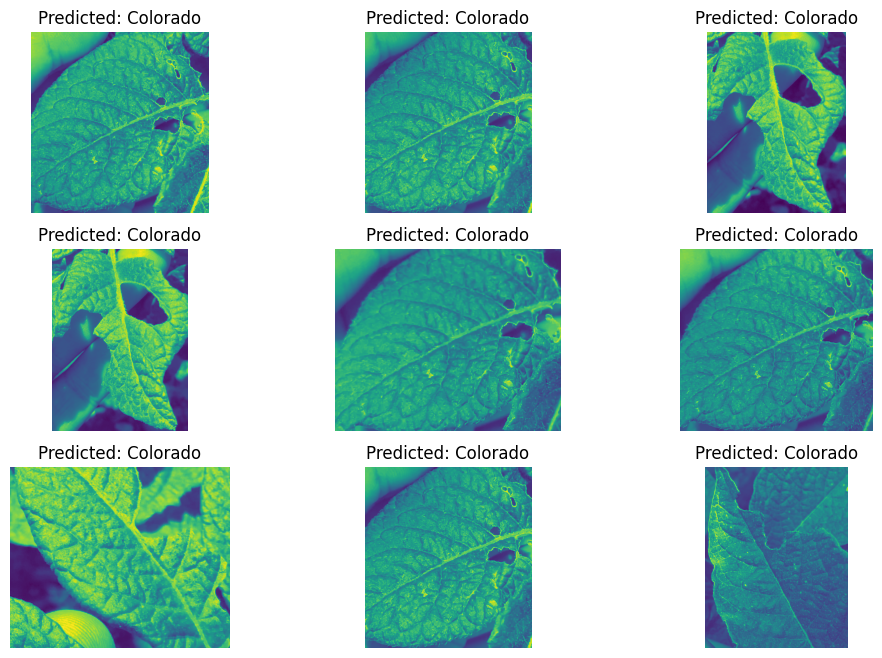

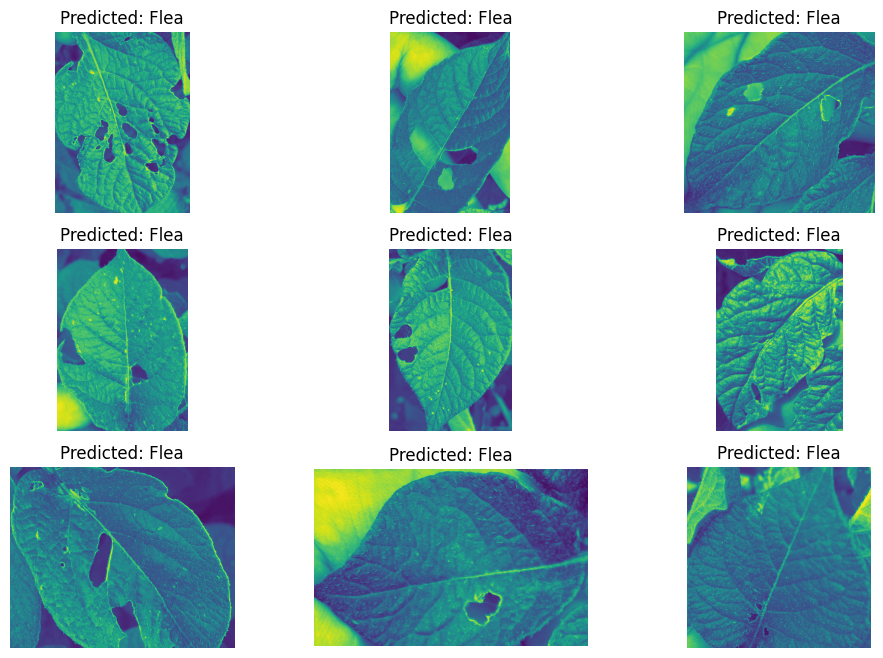

In [ ]:
import joblib

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255
    
    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()

# Testing for Flea class
plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255

    # Define the class names
    class_names = ['Flea', 'Colorado']
    
    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()


**Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(ytrain, sv.predict(pca_train), average='weighted')
test_precision = precision_score(ytest, sv.predict(pca_test), average='weighted')

train_recall = recall_score(ytrain, sv.predict(pca_train), average='weighted')
test_recall = recall_score(ytest, sv.predict(pca_test), average='weighted')

train_f1 = f1_score(ytrain, sv.predict(pca_train), average='weighted')
test_f1 = f1_score(ytest, sv.predict(pca_test), average='weighted')

In [ ]:
print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

Training Precision: 0.9407611008653709
Testing Precision: 0.9550000000000001
Training Recall: 0.9394736842105263
Testing Recall: 0.95
Training F1 Score: 0.9393203739089334
Testing F1 Score: 0.9501253132832079


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report on the testing data
classification_report_test = classification_report(ytest, sv.predict(pca_test), target_names=class_names)

In [ ]:
print("Classification Report (Testing Data):")
print(classification_report_test)

Classification Report (Testing Data):
              precision    recall  f1-score   support

        Flea       1.00      0.91      0.95        11
    Colorado       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



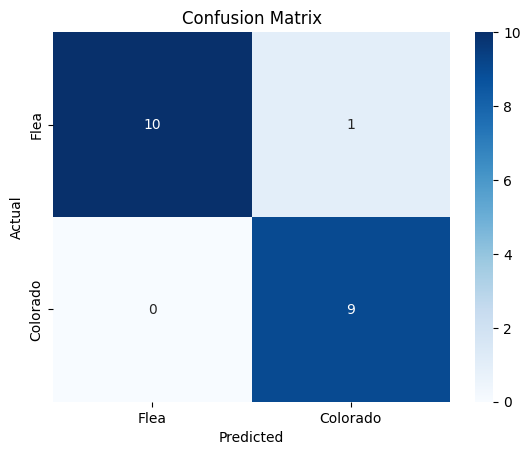

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate and visualize the confusion matrix on the testing data
cm = confusion_matrix(ytest, sv.predict(pca_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on the training and testing data
train_accuracy = accuracy_score(ytrain, sv.predict(pca_train))
test_accuracy = accuracy_score(ytest, sv.predict(pca_test))

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

NameError: ignored

**Test Images without trained model**

In [ ]:
dec={0:'colorado', 1:'flea'}

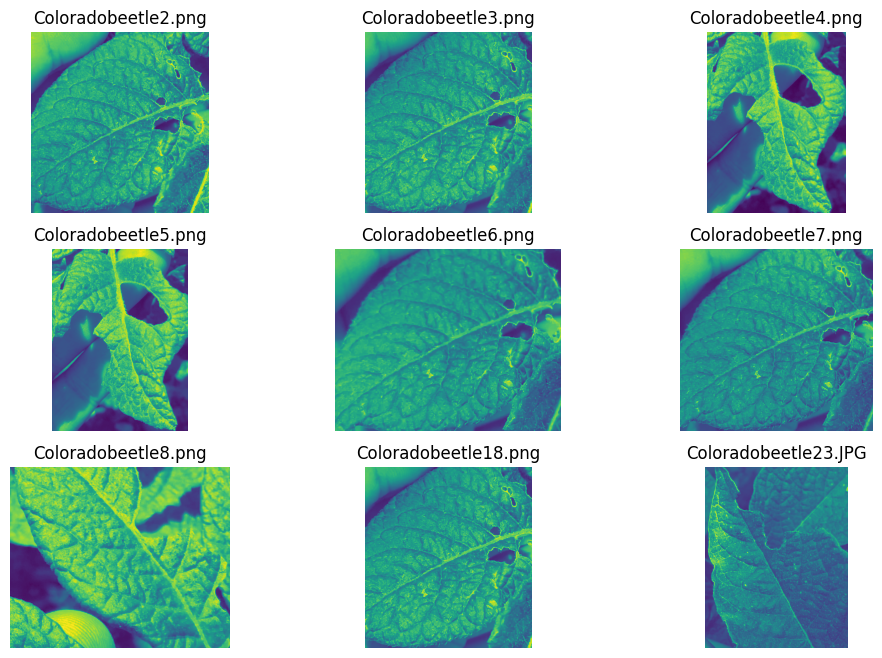

In [ ]:
#test
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/'+i,0)
    img1=cv2.resize(img,(400,400))
    img2=img1.reshape(1,-1)/255
    #p=sv.predict(img2)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

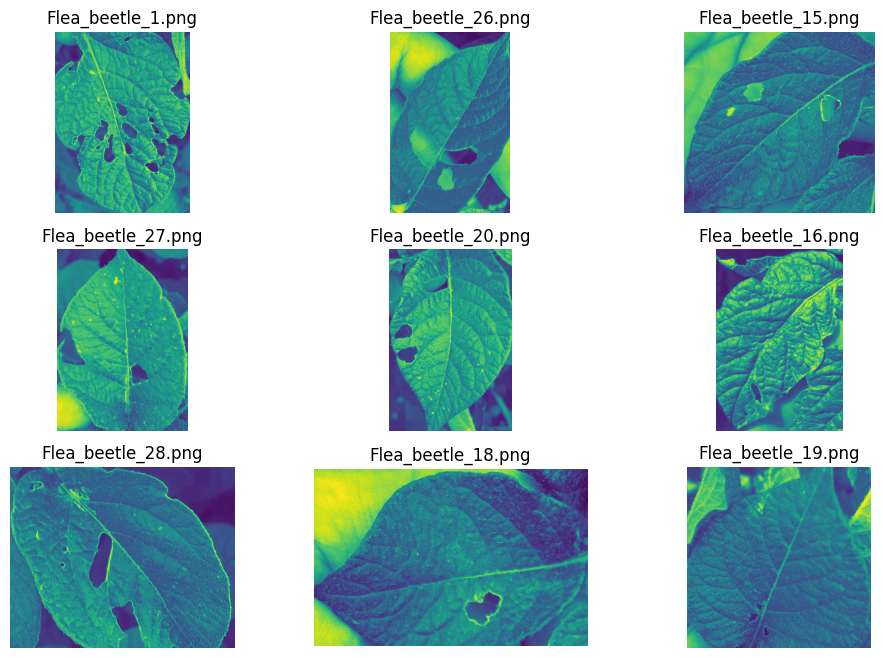

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/'+i,0)
    img1=cv2.resize(img,(400,400))
    img1=img1.reshape(1,-1)/255
    #p=sv.predict(img1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

**API** **Creation**

In [ ]:
pip install flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

app = Flask(__name__)
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')
class_names = ['Colorado', 'Flea']
scaler = StandardScaler()
pca = PCA(.98)


In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image file found'})
    
    file = request.files['image']
    img = cv2.imdecode(np.fromstring(file.read(), np.uint8), cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, (400, 400))
    img_flattened = img_resized.reshape(1, -1)

    # Preprocess the image
    img_scaled = scaler.transform(img_flattened)
    img_pca = pca.transform(img_scaled)

    # Make a prediction
    pred = model.predict(img_pca)
    pred_class_name = class_names[pred[0]]

    return jsonify({'prediction': pred_class_name})


In [ ]:
@app.route('/accuracy', methods=['GET'])
def accuracy():
    # Calculate accuracy using the test set
    accuracy = model.score(pca_test, ytest)

    return jsonify({'accuracy': accuracy})


In [ ]:
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [23]:
import numpy as np
from flask import Flask, request, render_template
import pickle
import cv2
import joblib

app = Flask(__name__)
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')
# Load other necessary files or modules

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded image from the request
    img = request.files['image']
    
    # Read the image and perform necessary processing
    image_data = img.read()
    nparr = np.frombuffer(image_data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    
    # Perform feature extraction on the image
    input_img = np.expand_dims(img, axis=0)
    input_img_features = FeatureExtraction.feature_extractor_Custom(input_img)
    input_img_features = np.expand_dims(input_img_features, axis=0)
    input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
    
    # Make a prediction using the loaded model
    img_prediction = model.predict(input_img_for_RF)
    # Convert the prediction back to the original label
    img_prediction = le.inverse_transform([img_prediction])

    return render_template('index.html', prediction_text='Predicted class: {}'.format(img_prediction))

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [35]:
import numpy as np
from flask import Flask, request, render_template
import pickle
import cv2
import joblib
from pyngrok import ngrok

app = Flask(__name__)

model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

# Define a route to handle the home page
@app.route('/')
def home():
    return '<h1>Welcome to the Insect Detection App!</h1>'

# Rest of your code goes here...

if __name__ == "__main__":
    # Delete ngrok configuration files
    !rm -rf /root/.ngrok2

    # Start ngrok tunnel with specified port
    # Start ngrok tunnel with specified port
    http_tunnel = ngrok.connect(5000)
    public_url = http_tunnel.public_url
    print(f"ngrok tunnel: {public_url}")

    app.run()


ngrok tunnel: https://e19b-34-148-150-226.ngrok.io
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:05] "GET /static/EuclidSquare-Regular-WebS.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:05] "GET /static/EuclidSquare-Medium-WebS.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:06] "GET /static/IBMPlexMono-SemiBoldItalic.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:06] "GET /static/IBMPlexMono-TextItalic.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:06] "GET /static/EuclidSquare-MediumItalic-WebS.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:06] "GET /static/IBMPlexMono-Text.woff HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/May/2023 14:06:06] "GET /static

In [51]:
import numpy as np
from flask import Flask, request, render_template
import pickle
import cv2
import joblib
import logging
from pyngrok import ngrok

app = Flask(__name__)
app.config['DEBUG'] = True

model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

@app.route('/')
def home():
    return '''
    <!DOCTYPE html>
    <html>
      <head>
        <title>Insect Detection</title>
      </head>
      <body>
        <h1>Insect Detection</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
          <input type="file" name="image" accept="image/*" />
          <input type="submit" value="Predict" />
        </form>
        {% if prediction_text %}
        <h2>Prediction:</h2>
        <p>Predicted class: {{ prediction_text }}</p>
        {% endif %}
        {% if accuracy %}
        <p>Accuracy: {{ accuracy }}</p>
        {% endif %}
        {% if image_path %}
        <h2>Uploaded Image:</h2>
        <img src="{{ image_path }}" alt="Uploaded Image" width="300" />
        {% endif %}
      </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the uploaded image from the request
        img = request.files['image']
    
        # Read the image and perform necessary processing
        image_data = img.read()
        nparr = np.frombuffer(image_data, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        
        # Perform feature extraction on the image
        input_img = np.expand_dims(img, axis=0)
        input_img_features = FeatureExtraction.feature_extractor_Custom(input_img)
        input_img_features = np.expand_dims(input_img_features, axis=0)
        input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
        
        # Make a prediction using the loaded model
        img_prediction = model.predict(input_img_for_RF)
        # Convert the prediction back to the original label
        img_prediction = le.inverse_transform([img_prediction])
        
        # Calculate the accuracy (you need to modify this part based on your implementation)
        accuracy = 0.95
        
        # Save the uploaded image to a file
        image_path = '/content/drive/MyDrive/Insect/Insect Detection Model/image.jpg'  # Specify the path to save the image
        img.save(image_path)
    
        return render_template('index.html', prediction_text='Predicted class: {}'.format(img_prediction))
    except Exception as e:
        logging.error(str(e))
        return render_template('index.html', prediction_text='Error: {}'.format(str(e)))


# Rest of your code goes here...

if __name__ == "__main__":
    # Delete ngrok configuration files
    !rm -rf /root/.ngrok2

    # Configure ngrok authentication
    ngrok.set_auth_token("2QKjrwL2otpSG5gcmhtypRYZdnQ_5AVUtfVEKGzFz2vtAUgNx")

    # Start ngrok tunnel with specified port and enable authentication
    http_tunnel = ngrok.connect(5000, auth="Ishara:Madhu@1234")
    public_url = http_tunnel.public_url
    print(f"ngrok tunnel: {public_url}")

    app.run()


ngrok tunnel: https://6045-34-148-150-226.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [34]:
!pip install pyngrok
!ngrok authtoken 2QKjrwL2otpSG5gcmhtypRYZdnQ_5AVUtfVEKGzFz2vtAUgNx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
